In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets download grassknoted/asl-alphabet

100% 1.03G/1.03G [00:46<00:00, 32.4MB/s]
100% 1.03G/1.03G [00:46<00:00, 23.9MB/s]


In [ ]:
!unzip asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import skimage
from skimage.transform import resize
from IPython.display import Image, display

import tensorflow as tf
from tensorflow import keras
import os
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
train_path = '/content/asl_alphabet_train/asl_alphabet_train'
test_path = '/content/asl_alphabet_test/asl_alphabet_test'

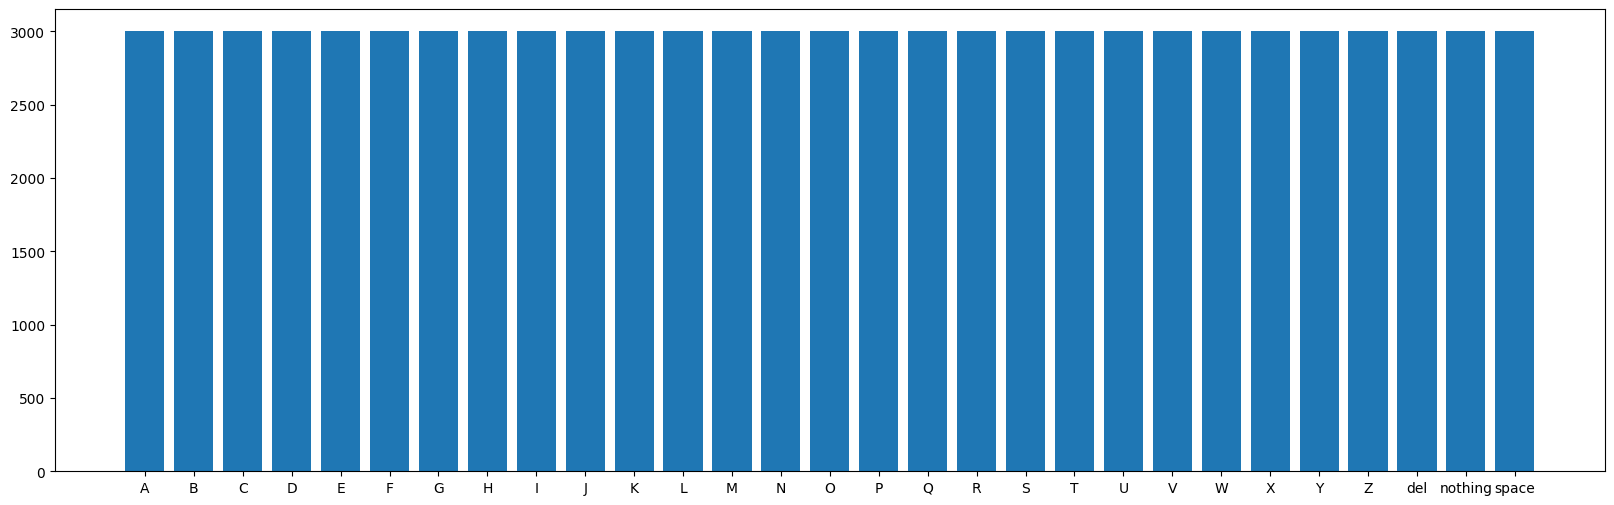

In [ ]:
classes = sorted(os.listdir(train_path))
numbers = []

for i in classes:
  numbers.append(len(os.listdir(train_path + '/' + i)))
  
plt.figure(figsize = (20,6))
plt.bar(classes, numbers)
plt.show()

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

A


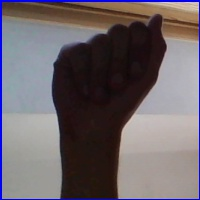

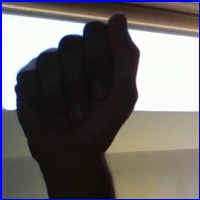

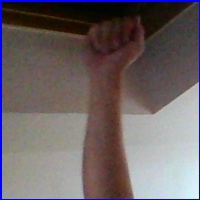

There are 3000 images in A class.

B


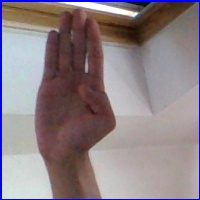

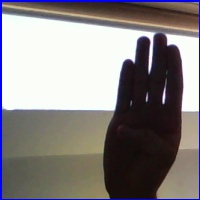

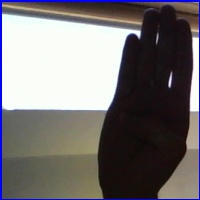

There are 3000 images in B class.

C


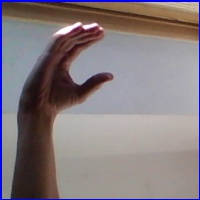

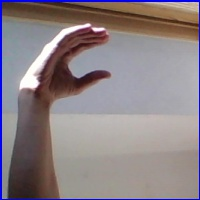

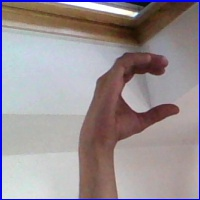

There are 3000 images in C class.

D


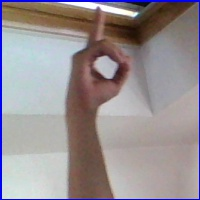

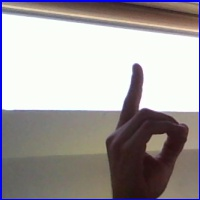

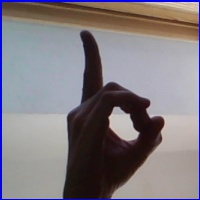

There are 3000 images in D class.

E


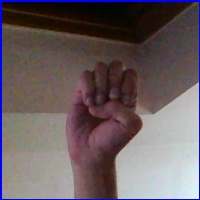

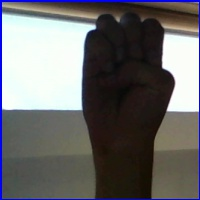

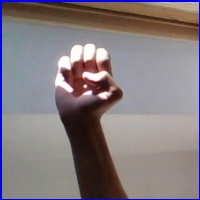

There are 3000 images in E class.

F


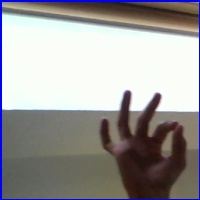

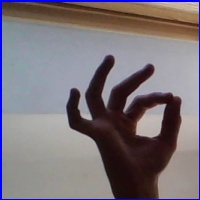

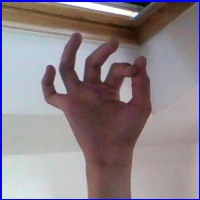

There are 3000 images in F class.

G


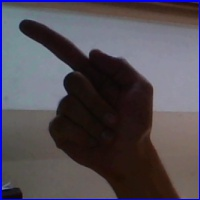

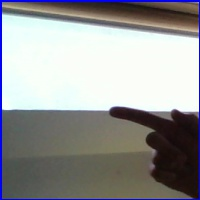

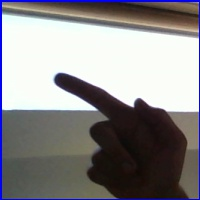

There are 3000 images in G class.

H


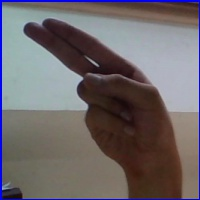

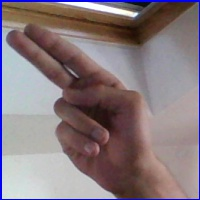

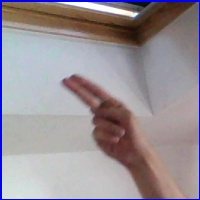

There are 3000 images in H class.

I


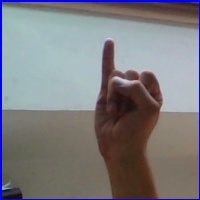

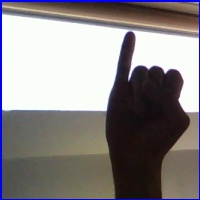

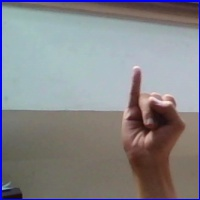

There are 3000 images in I class.

J


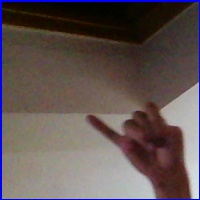

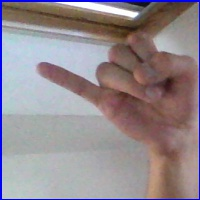

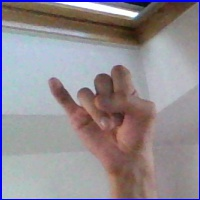

There are 3000 images in J class.

K


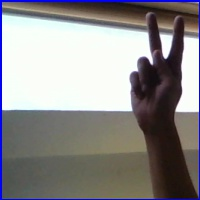

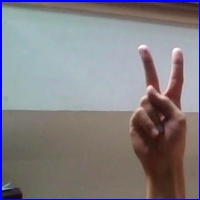

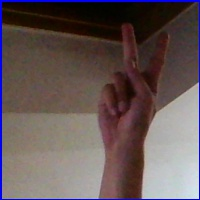

There are 3000 images in K class.

L


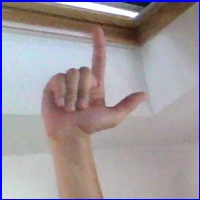

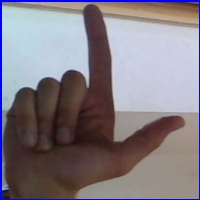

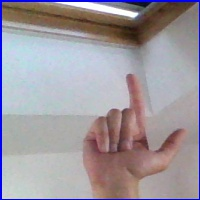

There are 3000 images in L class.

M


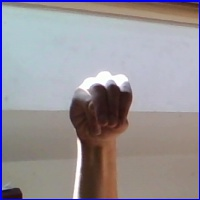

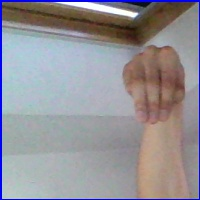

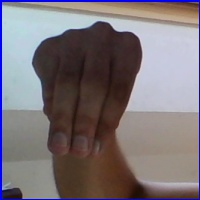

There are 3000 images in M class.

N


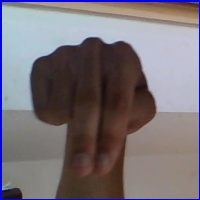

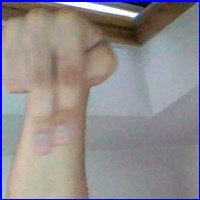

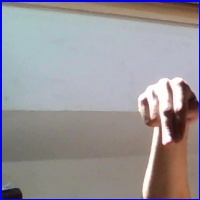

There are 3000 images in N class.

O


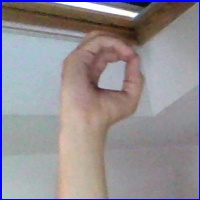

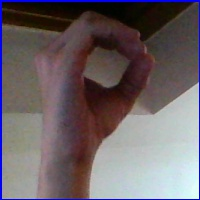

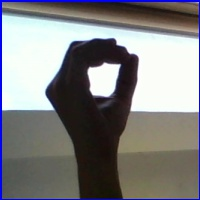

There are 3000 images in O class.

P


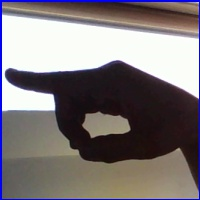

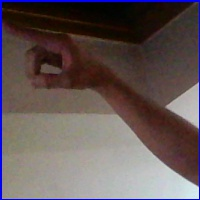

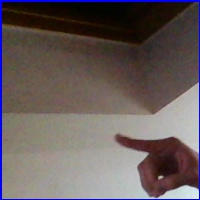

There are 3000 images in P class.

Q


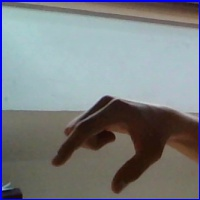

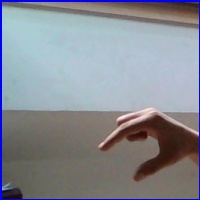

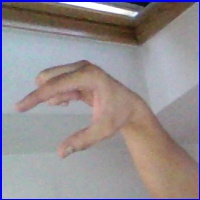

There are 3000 images in Q class.

R


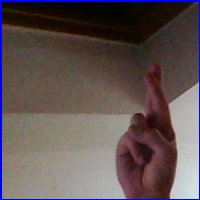

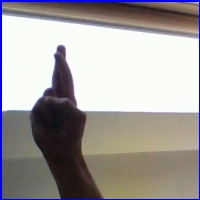

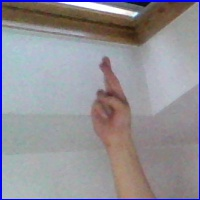

There are 3000 images in R class.

S


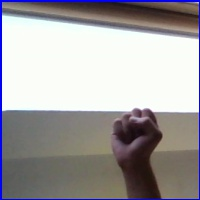

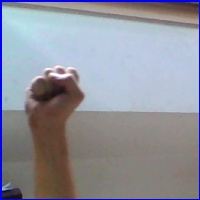

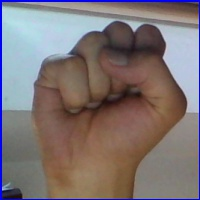

There are 3000 images in S class.

T


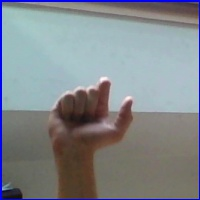

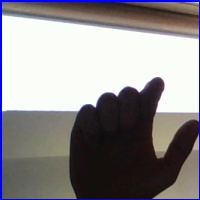

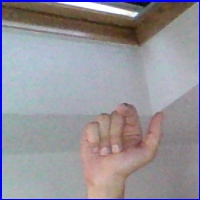

There are 3000 images in T class.

U


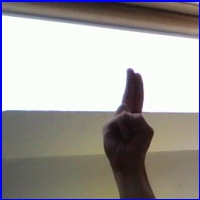

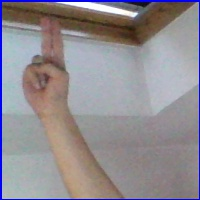

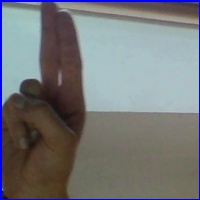

There are 3000 images in U class.

V


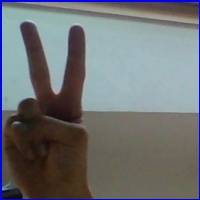

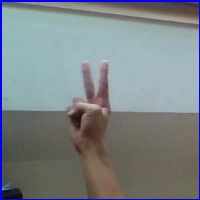

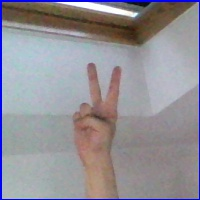

There are 3000 images in V class.

W


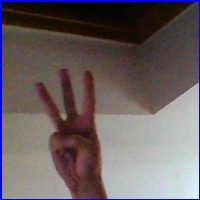

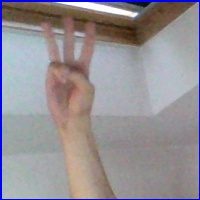

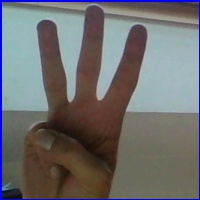

There are 3000 images in W class.

X


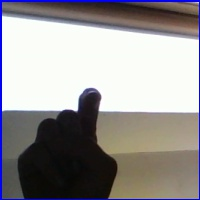

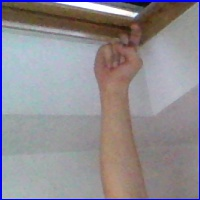

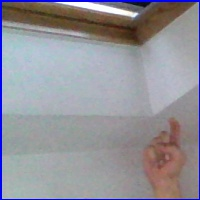

There are 3000 images in X class.

Y


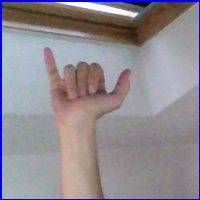

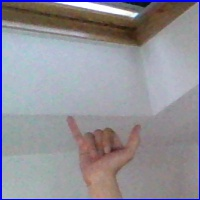

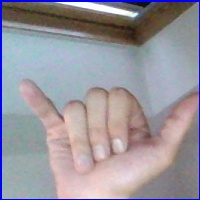

There are 3000 images in Y class.

Z


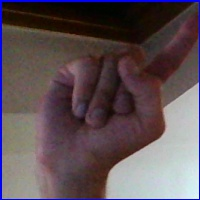

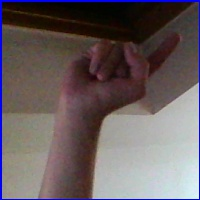

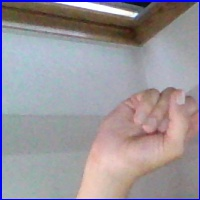

There are 3000 images in Z class.

del


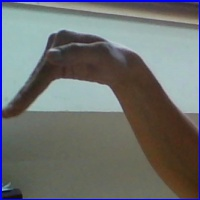

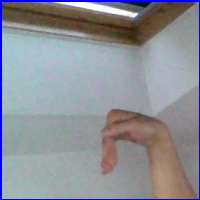

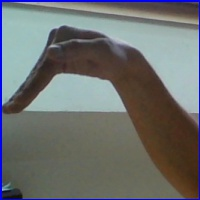

There are 3000 images in del class.

nothing


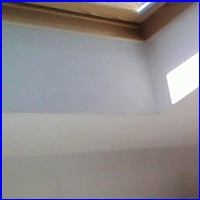

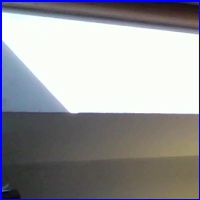

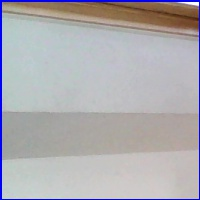

There are 3000 images in nothing class.

space


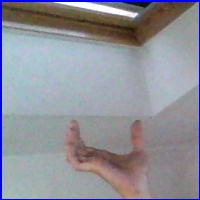

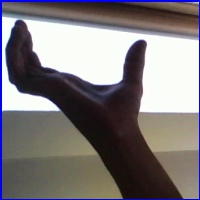

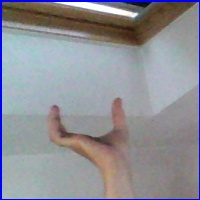

There are 3000 images in space class.


In [ ]:
labels = sorted(os.listdir(train_path))
print(labels)

for i in labels:
  path = train_path + '/' + i
  folder_data = os.listdir(path)
  k = 0
  print("")
  print(i)
  for image_path in folder_data:
    if k < 3:
      display(Image(path + '/' + image_path))
    k += 1
  print('There are', k, 'images in', i, 'class.')

In [ ]:
def obtain_data(data_dir):
  images = []
  labels = []
  dir_list = sorted(os.listdir(data_dir))
  for i in range(len(dir_list)):
    print('Obtaining', dir_list[i], 'images.')
    for image in os.listdir(data_dir + '/' + dir_list[i]):
      img = cv2.imread(data_dir + '/' + dir_list[i] + '/' + image)
      img = cv2.resize(img, (32, 32))
      images.append(img)
      labels.append(i)
  return images, labels

x, y = obtain_data(train_path)

Obtaining A images.
Obtaining B images.
Obtaining C images.
Obtaining D images.
Obtaining E images.
Obtaining F images.
Obtaining G images.
Obtaining H images.
Obtaining I images.
Obtaining J images.
Obtaining K images.
Obtaining L images.
Obtaining M images.
Obtaining N images.
Obtaining O images.
Obtaining P images.
Obtaining Q images.
Obtaining R images.
Obtaining S images.
Obtaining T images.
Obtaining U images.
Obtaining V images.
Obtaining W images.
Obtaining X images.
Obtaining Y images.
Obtaining Z images.
Obtaining del images.
Obtaining nothing images.
Obtaining space images.


In [ ]:
def preprocess_data(x, y):
  np_x = np.array(x)
  normalised_x = np_x.astype('float32') / 255
  label_encoded_y = utils.to_categorical(y)
  x_train, x_valtest, y_train, y_valtest = train_test_split(normalised_x, label_encoded_y, train_size = 0.8)
  x_val, x_test, y_val, y_test = train_test_split(x_valtest, y_valtest, test_size = 0.5)
  return x_train, x_val, x_test, y_train, y_val, y_test

x_train, x_val, x_test, y_train, y_val, y_test = preprocess_data(x, y)

In [ ]:
print("Training data:", x_train.shape)
print("Validation data:", x_val.shape)
print("Test data:", x_test.shape)

Training data: (69600, 32, 32, 3)
Validation data: (8700, 32, 32, 3)
Test data: (8700, 32, 32, 3)


In [ ]:
vgg19_model = tf.keras.applications.VGG19(input_shape = (32,32,3), include_top = False, weights = 'imagenet')

80134624/80134624 [==============================] - 4s 0us/step


In [ ]:
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
for layer in vgg19_model.layers:
  layer.trainable = False

In [ ]:
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
model = tf.keras.Sequential([
  vgg19_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(1000, activation = 'relu'),
  tf.keras.layers.Dense(29, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1000)              513000    
                                                                 
 dense_1 (Dense)             (None, 29)                29029     
                                                                 
Total params: 20,566,413
Trainable params: 542,029
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
base_learning_rate = 0.0001

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = base_learning_rate), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_val, y_val))

Epoch 1/10
2175/2175 [==============================] - 1301s 597ms/step - loss: 1.7890 - accuracy: 0.5384 - val_loss: 1.1824 - val_accuracy: 0.6899
Epoch 2/10
2175/2175 [==============================] - 1272s 585ms/step - loss: 0.9676 - accuracy: 0.7477 - val_loss: 0.8165 - val_accuracy: 0.7811
Epoch 3/10
2175/2175 [==============================] - 1267s 583ms/step - loss: 0.7054 - accuracy: 0.8143 - val_loss: 0.6393 - val_accuracy: 0.8251
Epoch 4/10
2175/2175 [==============================] - 1266s 582ms/step - loss: 0.5564 - accuracy: 0.8541 - val_loss: 0.5286 - val_accuracy: 0.8533
Epoch 5/10
2175/2175 [==============================] - 1268s 583ms/step - loss: 0.4563 - accuracy: 0.8805 - val_loss: 0.4379 - val_accuracy: 0.8808
Epoch 6/10
2175/2175 [==============================] - 1267s 582ms/step - loss: 0.3845 - accuracy: 0.8999 - val_loss: 0.3777 - val_accuracy: 0.8977
Epoch 7/10
2175/2175 [==============================] - 1268s 583ms/step - loss: 0.3306 - accuracy: 0.9146

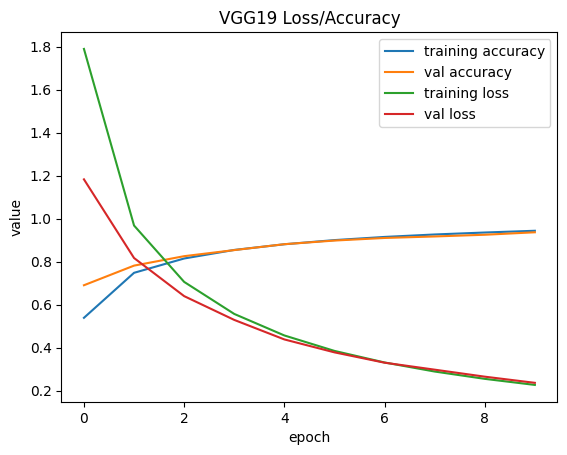

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('VGG19 Loss/Accuracy')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

272/272 [==============================] - 139s 512ms/step - loss: 0.2324 - accuracy: 0.9406
Test Accuracy: 0.9405747056007385
Test Loss: 0.23235101997852325


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis = -1)
y_pred

272/272 [==============================] - 141s 518ms/step


array([ 7, 15, 10, ...,  7,  8, 13])

In [ ]:
y_testing = np.argmax(y_test, axis = 1)
y_testing

array([ 7, 15, 10, ...,  7,  8, 12])

In [ ]:
print('The accuracy obtained on the test set using VGG19 is:', accuracy_score(y_pred, y_testing))

The accuracy obtained on the test set using VGG19 is: 0.9405747126436782


In [ ]:
print(classification_report(y_testing, y_pred, digits=8))

              precision    recall  f1-score   support

           0  0.97749196 0.92121212 0.94851794       330
           1  0.88081395 0.99019608 0.93230769       306
           2  1.00000000 0.97689769 0.98831386       303
           3  0.94212219 0.99659864 0.96859504       294
           4  0.95488722 0.86101695 0.90552585       295
           5  0.98634812 0.96979866 0.97800338       298
           6  0.97377049 0.96428571 0.96900489       308
           7  0.98338870 0.99328859 0.98831386       298
           8  0.97902098 0.93959732 0.95890411       298
           9  0.98586572 0.98239437 0.98412698       284
          10  0.92767296 0.98006645 0.95315024       301
          11  0.98165138 0.99380805 0.98769231       323
          12  0.97080292 0.85806452 0.91095890       310
          13  0.89226519 0.98176292 0.93487699       329
          14  0.90851735 0.97297297 0.93964111       296
          15  0.94463668 0.98913043 0.96637168       276
          16  0.98591549 0.958904

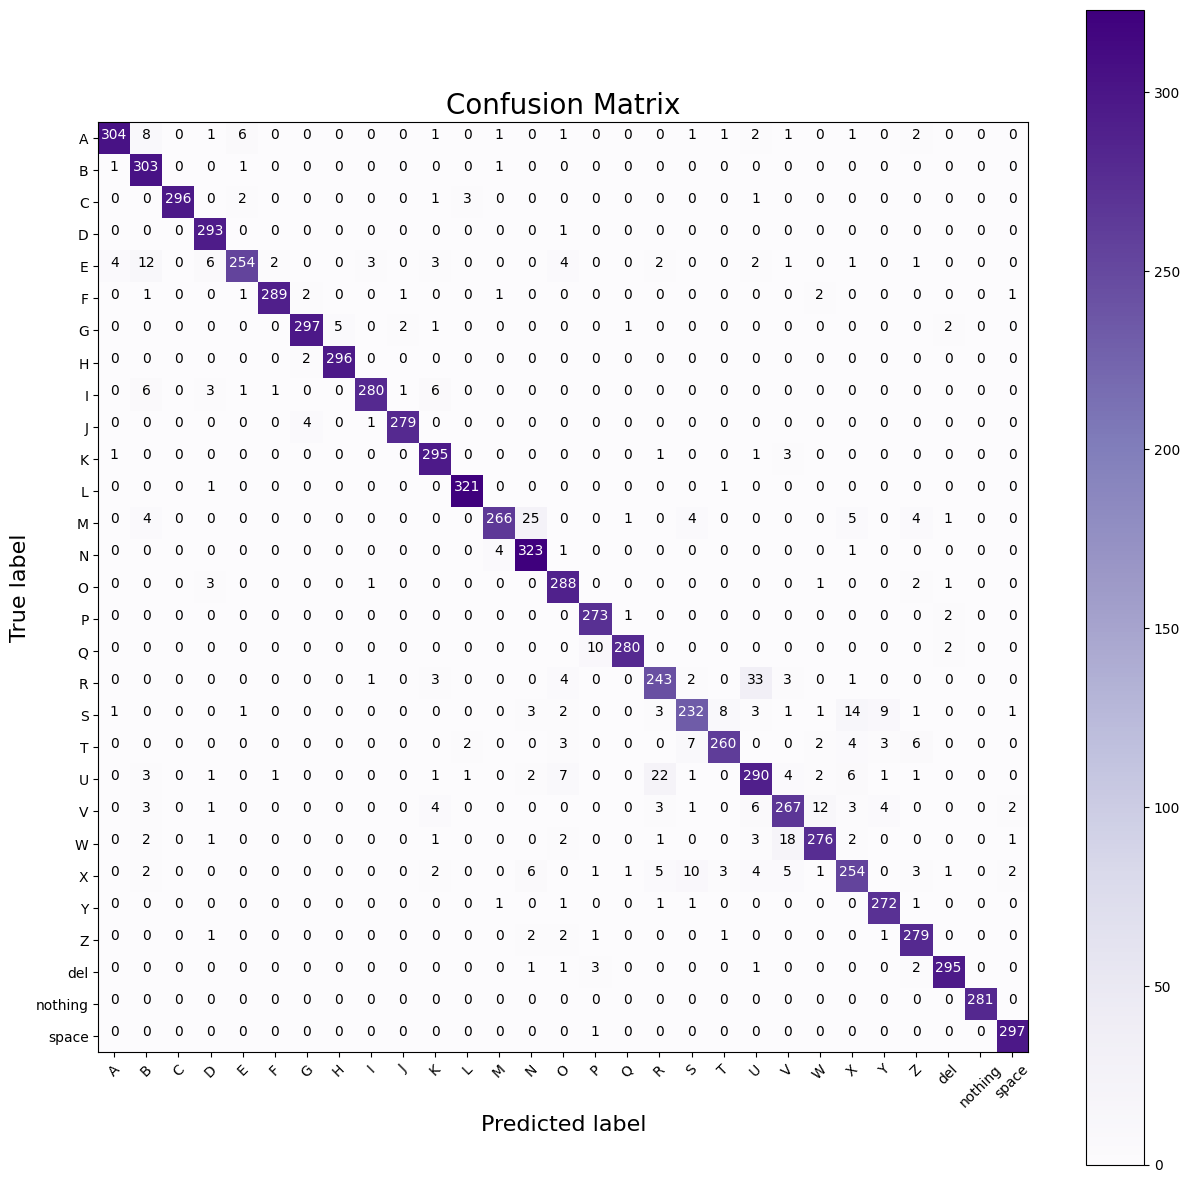

In [ ]:
def plot_confusion_matrix(y, y_pred):
  cm = confusion_matrix(y, y_pred)
  plt.figure(figsize = (15, 15))
  ax = plt.subplot()
  plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
  plt.colorbar()
  plt.title("Confusion Matrix")
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ax.title.set_fontsize(20)
  ax.xaxis.label.set_fontsize(16)
  ax.yaxis.label.set_fontsize(16)
  limit = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
  plt.show()

plot_confusion_matrix(y_testing, y_pred)

In [ ]:
print("Number of layers in the base model:", len(vgg19_model.layers))

Number of layers in the base model: 22


In [ ]:
for layer in vgg19_model.layers[:20]:
        layer.trainable = False
for layer in vgg19_model.layers[20:]:
        layer.trainable = True

In [ ]:
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1000)              513000    
                                                                 
 dense_1 (Dense)             (None, 29)                29029     
                                                                 
Total params: 20,566,413
Trainable params: 2,901,837
Non-trainable params: 17,664,576
_________________________________________________________________


In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = base_learning_rate/10), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
historyft = model.fit(x_train, y_train, epochs = 20, initial_epoch = history.epoch[-1], validation_data = (x_val, y_val))

Epoch 10/20
2175/2175 [==============================] - 1386s 637ms/step - loss: 0.1623 - accuracy: 0.9548 - val_loss: 0.1388 - val_accuracy: 0.9632
Epoch 11/20
2175/2175 [==============================] - 1386s 637ms/step - loss: 0.1054 - accuracy: 0.9727 - val_loss: 0.0999 - val_accuracy: 0.9769
Epoch 12/20
2175/2175 [==============================] - 1382s 635ms/step - loss: 0.0795 - accuracy: 0.9803 - val_loss: 0.0880 - val_accuracy: 0.9767
Epoch 13/20
2175/2175 [==============================] - 1385s 637ms/step - loss: 0.0624 - accuracy: 0.9851 - val_loss: 0.0641 - val_accuracy: 0.9836
Epoch 14/20
2175/2175 [==============================] - 1389s 639ms/step - loss: 0.0510 - accuracy: 0.9881 - val_loss: 0.0519 - val_accuracy: 0.9872
Epoch 15/20
2175/2175 [==============================] - 1390s 639ms/step - loss: 0.0415 - accuracy: 0.9910 - val_loss: 0.0487 - val_accuracy: 0.9857
Epoch 16/20
2175/2175 [==============================] - 1379s 634ms/step - loss: 0.0357 - accuracy:

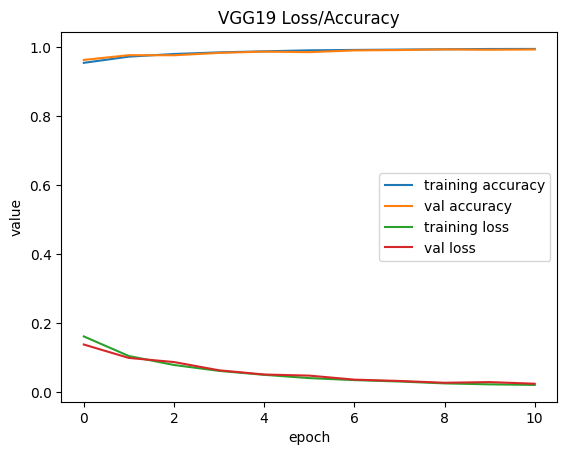

In [ ]:
plt.figure()
plt.plot(historyft.history['accuracy'], label='training accuracy')
plt.plot(historyft.history['val_accuracy'], label='val accuracy')
plt.plot(historyft.history['loss'], label='training loss')
plt.plot(historyft.history['val_loss'], label='val loss')
plt.title('VGG19 Loss/Accuracy')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

272/272 [==============================] - 140s 514ms/step - loss: 0.0260 - accuracy: 0.9936
Test Accuracy: 0.9935632348060608
Test Loss: 0.025982601568102837


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis = -1)
y_pred

272/272 [==============================] - 139s 509ms/step


array([ 7, 15, 10, ...,  7,  8, 12])

In [ ]:
y_testing = np.argmax(y_test, axis = 1)
y_testing

array([ 7, 15, 10, ...,  7,  8, 12])

In [ ]:
print('The accuracy obtained on the test set using VGG19 is:', accuracy_score(y_pred, y_testing))

The accuracy obtained on the test set using VGG19 is: 0.9935632183908046


In [ ]:
print(classification_report(y_testing, y_pred, digits=8))

              precision    recall  f1-score   support

           0  0.99696049 0.99393939 0.99544765       330
           1  1.00000000 1.00000000 1.00000000       306
           2  1.00000000 1.00000000 1.00000000       303
           3  1.00000000 1.00000000 1.00000000       294
           4  1.00000000 0.98983051 0.99488927       295
           5  0.99333333 1.00000000 0.99665552       298
           6  1.00000000 1.00000000 1.00000000       308
           7  1.00000000 1.00000000 1.00000000       298
           8  0.99665552 1.00000000 0.99832496       298
           9  1.00000000 1.00000000 1.00000000       284
          10  1.00000000 0.99335548 0.99666667       301
          11  1.00000000 0.99690402 0.99844961       323
          12  0.99348534 0.98387097 0.98865478       310
          13  0.98502994 1.00000000 0.99245852       329
          14  0.98662207 0.99662162 0.99159664       296
          15  0.99636364 0.99275362 0.99455535       276
          16  0.99317406 0.996575

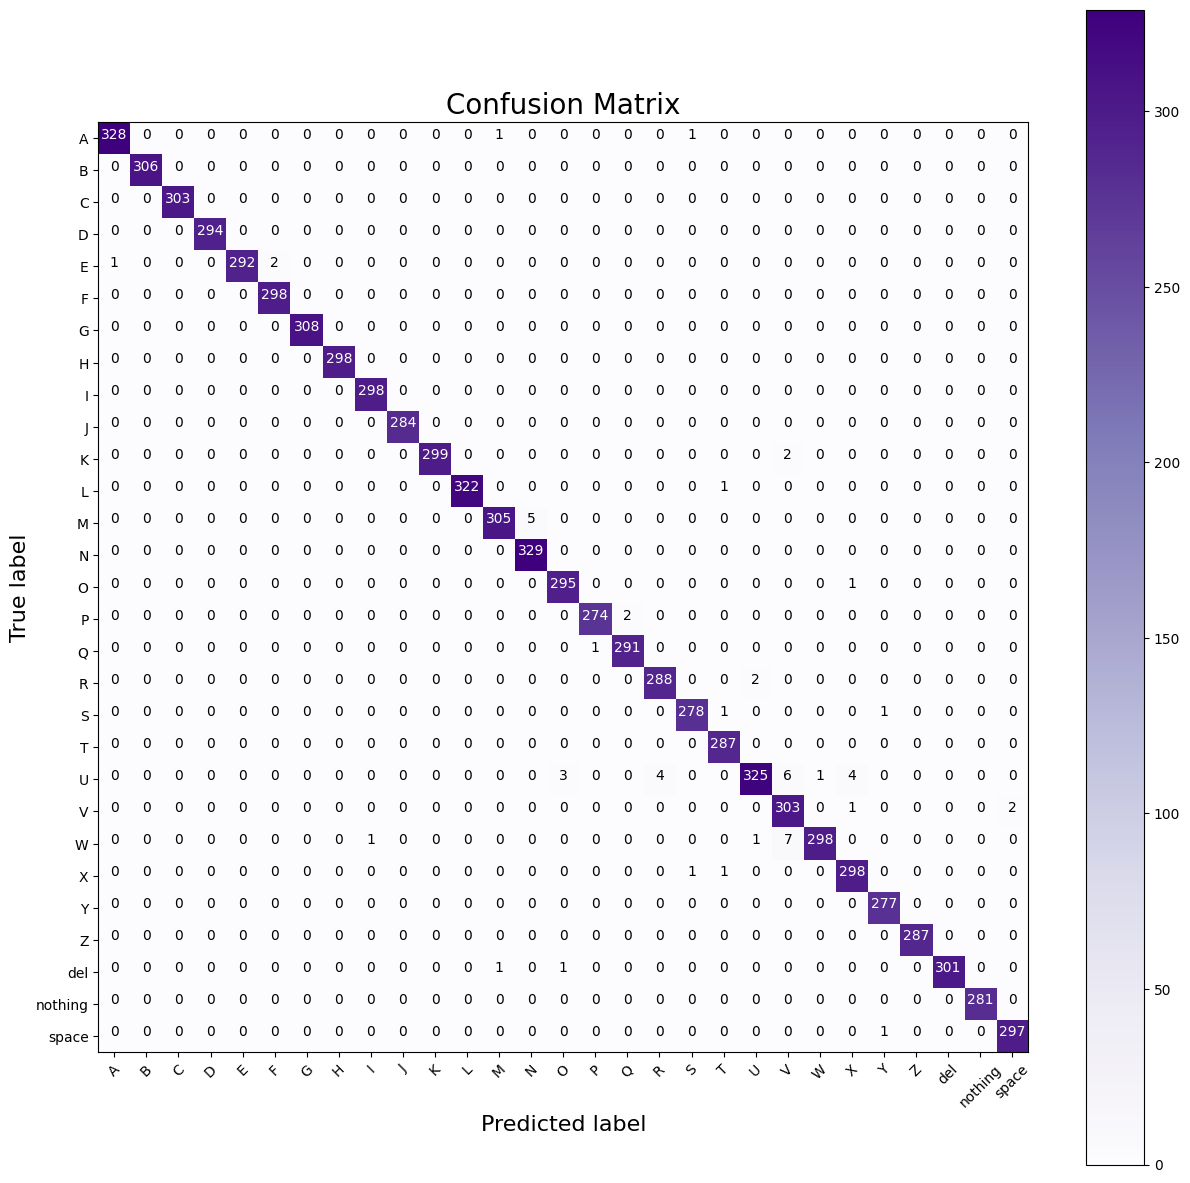

In [ ]:
def plot_confusion_matrix(y, y_pred):
  cm = confusion_matrix(y, y_pred)
  plt.figure(figsize = (15, 15))
  ax = plt.subplot()
  plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
  plt.colorbar()
  plt.title("Confusion Matrix")
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ax.title.set_fontsize(20)
  ax.xaxis.label.set_fontsize(16)
  ax.yaxis.label.set_fontsize(16)
  limit = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
  plt.show()

plot_confusion_matrix(y_testing, y_pred)

1/1 [==============================] - 0s 120ms/step
Prediction of image is: C



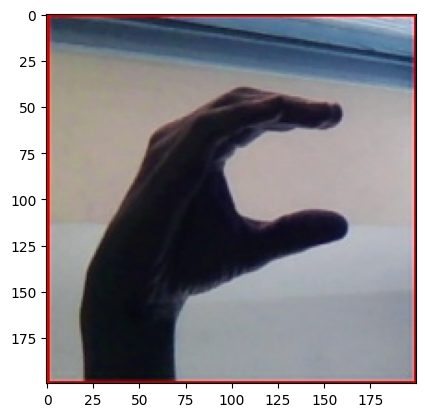

In [ ]:
testimage = []
img = cv2.imread('/content/asl_alphabet_test/asl_alphabet_test/C_test.jpg')
plt.imshow(img)
img = cv2.resize(img, (32, 32))
testimage.append(img)
np_x = np.array(testimage)
imge = np_x.astype('float32') / 255
predict = np.argmax(model.predict(imge), axis = -1)

if predict[0] == 0:
  prediction = 'A'
elif predict[0] == 1:
  prediction = 'B'
elif predict[0] == 2:
  prediction = 'C'
elif predict[0] == 3:
  prediction = 'D'
elif predict[0] == 4:
  prediction = 'E'
elif predict[0] == 5:
  prediction = 'F'
elif predict[0] == 6:
  prediction = 'G'
elif predict[0] == 7:
  prediction = 'H'
elif predict[0] == 8:
  prediction = 'I'
elif predict[0] == 9:
  prediction = 'J'
elif predict[0] == 10:
  prediction = 'K'
elif predict[0] == 11:
  prediction = 'L'
elif predict[0] == 12:
  prediction = 'M'
elif predict[0] == 13:
  prediction = 'N'
elif predict[0] == 14:
  prediction = 'O'
elif predict[0] == 15:
  prediction = 'P'
elif predict[0] == 16:
  prediction = 'Q'
elif predict[0] == 17:
  prediction = 'R'
elif predict[0] == 18:
  prediction = 'S'
elif predict[0] == 19:
  prediction = 'T'
elif predict[0] == 20:
  prediction = 'U'
elif predict[0] == 21:
  prediction = 'V'
elif predict[0] == 22:
  prediction = 'W'
elif predict[0] == 23:
  prediction = 'X'
elif predict[0] == 24:
  prediction = 'Y'
elif predict[0] == 25:
  prediction = 'Z'
elif predict[0] == 26:
  prediction = 'del'
elif predict[0] == 27:
  prediction = 'nothing'
elif predict[0] == 28:
  prediction = 'space'
else:
  prediction = 'invalid'
    
print('Prediction of image is:', prediction)
print('')